<a href="https://colab.research.google.com/github/mahaairshad/CE888_si19783/blob/master/Lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab2: This code contains bootstrap function following the bootstrap algorithm 

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt

(1) The bootstrap:

In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv',sep=',')
data = df.values.T[1]
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


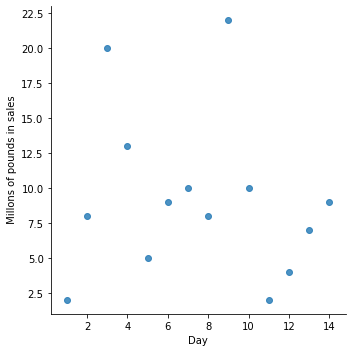

In [0]:
sns.lmplot(df.columns[0], df.columns[1],data=df, fit_reg=False)

In [0]:
bootstraps=4
statistics=[]
for i in range(bootstraps):
 sample = np.random.choice(data,size=len(data),replace='TRUE')
 #stat = np.mean(sample)
 statistics.append(sample)

#np.mean(statistics)
sample=np.sort(sample)
print(sample)

[ 2.  2.  2.  4.  4.  7.  8.  8.  9. 10. 10. 13. 20. 20.]


In [0]:
print(statistics)

[array([ 7., 20.,  7.,  8.,  2., 10.,  2., 10., 22.,  4.,  4.,  5.,  8.,
       20.]), array([20.,  8., 20.,  4., 10.,  9.,  9.,  9.,  5.,  7., 13.,  8., 13.,
       20.]), array([10., 13., 10., 13., 10., 20., 22.,  8.,  8., 10.,  2., 10., 10.,
        9.]), array([ 8.,  8.,  9., 10.,  2.,  4., 20., 13.,  2., 20., 10.,  2.,  7.,
        4.])]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->
	statistics=[]
	mean_samples=[]
	for i in range(n_iterations):
		sample = np.random.choice(data,size=sample_size,replace='TRUE')
		statistics.append(sample)
		mean_sample = np.mean(sample)
		mean_samples.append(mean_sample)
	data_mean=np.mean(statistics)
	mean_samples=np.sort(mean_samples)
	lower=np.percentile(mean_samples,2.5)
	upper=np.percentile(mean_samples,97.5)
	return data_mean, lower, upper

(0, 100000)

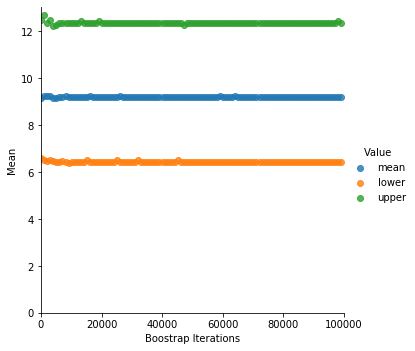

In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(d_sample, sample_size, iterations, ci):
	# <---INSERT YOUR CODE HERE--->
	statistics=[]
	mean_samples=[]
	for i in range(iterations):
		sample = np.random.choice(d_sample,size=sample_size,replace='TRUE')
		statistics.append(sample)
		mean_sample = np.nanmean(sample)
		mean_samples.append(mean_sample)
	data_mean=np.nanmean(statistics)
	mean_samples=np.sort(mean_samples)
	l=(100-ci)/2
	u=(100-l)
	lower=np.percentile(mean_samples,l)
	upper=np.percentile(mean_samples,u)
	return data_mean, lower, upper

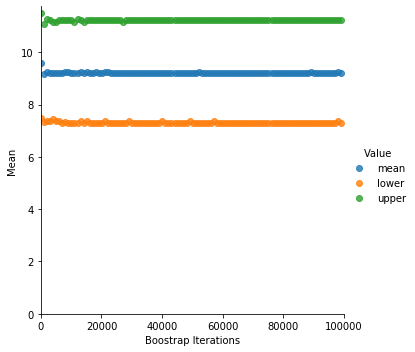

In [0]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


(2) Data visualisation:

###Vehicles dataset


In [87]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv',sep=',')
cur_flt_data = df.values.T[0]
new_flt_data = df.values.T[1]
print(new_flt_data.shape)

(249,)


In [0]:
vrange=np.arange(1,250,1)

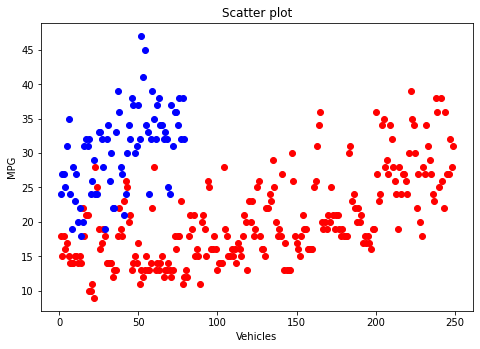

In [89]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(vrange, cur_flt_data, color='r')
ax.scatter(vrange, new_flt_data, color='b')
ax.set_xlabel('Vehicles')
ax.set_ylabel('MPG')
ax.set_title('Scatter plot')
plt.show()

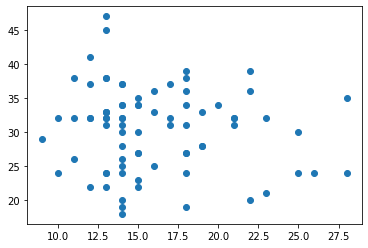

In [90]:
plt.scatter(cur_flt_data, new_flt_data)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 5.,  5., 12.,  8., 20., 13., 11.,  3.,  0.,  2.]),
 array([18. , 20.9, 23.8, 26.7, 29.6, 32.5, 35.4, 38.3, 41.2, 44.1, 47. ]),
 <a list of 10 Patch objects>)

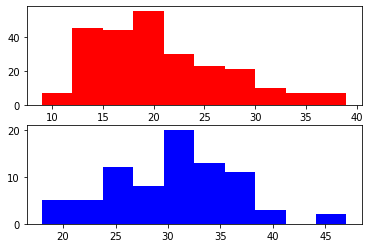

In [91]:
plt.subplot(2,1,1)
plt.hist(cur_flt_data, color='r')
plt.subplot(2,1,2)
plt.hist(new_flt_data, color='b')

(3) Bootstrap on the vehicles dataset:

In [0]:
#removing null values
new_flt_data = new_flt_data[~np.isnan(new_flt_data)]

In [93]:
cur_mean, cur_lo,cur_upp=boostrap_mean_ci(cur_flt_data, cur_flt_data.shape, 100, 95)
cur_mean #mean of current fleet

20.12586345381526

In [94]:
new_mean, new_lo,new_upp=boostrap_mean_ci(new_flt_data, new_flt_data.shape, 100, 95)
new_mean #mean of new fleet

30.52

In [0]:
tobs=new_mean-cur_mean

In [96]:
tobs

10.39413654618474

In [0]:
# Comparing the two fleets by permuatation test.

concat=np.concatenate((cur_flt_data,new_flt_data))

In [98]:
tot_perm=20000
count_perm=0
for i in range(tot_perm):
  perm=np.random.permutation(concat)
  pcur=perm[:int(len(perm)/2)]
  pnew=perm[int(len(perm)/2):]
  mean1=np.mean(pcur)
  mean2=np.mean(pnew)
  tperm=mean2-mean1
  if (tperm>tobs):
    count_perm=count_perm+1

p_value=count_perm/tot_perm

if p_value<0.05:
  print("Null hypothesis rejected")
else:
  print("Failed to reject the null hypothesis")

Null hypothesis rejected
